In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [67]:
data=pd.read_csv(r"C:\Users\rudra\Downloads\house_price_regression_dataset.csv")
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


## Basic EDA And Preprocessing Steps

In [3]:
data.shape

(1000, 8)

In [4]:
data.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [5]:
data.drop(columns='Neighborhood_Quality',axis=1,inplace=True)

In [6]:
data.corr()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,0.052133
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,1.000000


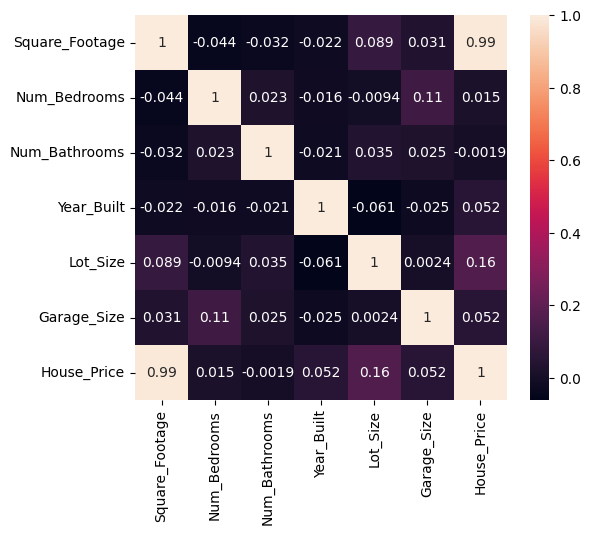

In [7]:
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [8]:
data[['Lot_Size','House_Price']]=round(data[['Lot_Size','House_Price']],0)

In [9]:
data.head(2)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,House_Price
0,1360,2,1,1981,1.0,0,262383.0
1,4272,3,3,2016,5.0,1,985261.0


## Train/Test Split

In [10]:
x=data.iloc[:,:-1]
y=data['House_Price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Pipeline And ColumnTransformers

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline

In [29]:
colm_tran=ColumnTransformer([
    ('scale',StandardScaler(),slice(0,5))
])

In [31]:
colm_tran

,transformers,"[('scale', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
pipe=Pipeline([
    ('colm_tran',colm_tran),
    ('model',LinearRegression())
])

In [37]:
pipe.fit(x_train,y_train)

,steps,"[('colm_tran', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scale', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
y_prd=pipe.predict(x_test)

In [41]:
df=pd.DataFrame({'Actual':y_test,'Predict':y_prd})
df.head()

,Actual,Predict
521,901000.0,8.666298e+05
737,494538.0,4.854450e+05
740,949404.0,9.488887e+05
660,1040389.0,1.025327e+06
411,794010.0,7.794028e+05


## Check Overfitting

In [44]:
test=pipe.score(x_test,y_test)*100
train=pipe.score(x_train,y_train)*100
print(f"Training Accuracy is {train} and Testing Accuracy is {test}")

Training Accuracy is 99.79782533931657 and Testing Accuracy is 99.78638387203738


## Export Pipeline

In [46]:
import pickle
pickle.dump(pipe,open("House.pkl","wb"))

In [48]:
import pickle
pipe=pickle.load(open("House.pkl","rb"))

In [69]:
new=np.array([[4926,2,1,1993,4.699073,0]]).reshape(1,6)
new

array([[4.926000e+03, 2.000000e+00, 1.000000e+00, 1.993000e+03,
        4.699073e+00, 0.000000e+00]])

In [71]:
pipe.predict(new)

array([1054502.1923948])

## Gui Application 

In [56]:
from tkinter import *

In [75]:
def show_entry():
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    pipe=pickle.load(open("House.pkl","rb"))
    df=pd.DataFrame({
        'Square_Footage':p1,
        'Num_Bedrooms':p2,
        'Num_Bathrooms':p3,
        'Year_Built':p4,
        'Lot_Size':p5,
        'Garage_Size':p6
        },index=[0])
    result=pipe.predict(df)
    result=np.round(result,0)
    Label(master,text=result[0],bg='black',fg='#00FF00',font=("Arial",20,"bold")).grid(row=14)

master =Tk()
master.geometry("700x700")
master.configure(bg="black")
master.title("House Prediction Model")
label=Label(master,text="House Price Prediction Model",bg='black',fg='white',font=("Arial",20,"bold")).grid(row=0,columnspan=12)
Label(master,text="Square_Footage",bg='black',fg='cyan',font=("Arial",18,"bold")).grid(row=1)
Label(master,text="Num_Bedrooms",bg='black',fg='cyan',font=("Arial",18,"bold")).grid(row=2)
Label(master,text="Num_Bathrooms",bg='black',fg='cyan',font=("Arial",18,"bold")).grid(row=3)
Label(master,text="Year_Built",bg='black',fg='cyan',font=("Arial",18,"bold")).grid(row=4)
Label(master,text="Lot_Size",bg='black',fg='cyan',font=("Arial",18,"bold")).grid(row=5)
Label(master,text="Garage_Size",bg='black',fg='cyan',font=("Arial",18,"bold")).grid(row=6)

entry_font=("Arial",16,"bold")
e1=Entry(master,width=20,font=entry_font,fg='black')
e2=Entry(master,width=20,font=entry_font,fg='black')
e3=Entry(master,width=20,font=entry_font,fg='black')
e4=Entry(master,width=20,font=entry_font,fg='black')
e5=Entry(master,width=20,font=entry_font,fg='black')
e6=Entry(master,width=20,font=entry_font,fg='black')

e1.grid(row=1,column=1,pady=10)
e2.grid(row=2,column=1,pady=10)
e3.grid(row=3,column=1,pady=10)
e4.grid(row=4,column=1,pady=10)
e5.grid(row=5,column=1,pady=10)
e6.grid(row=6,column=1,pady=10)


Button(master,text="Predict House Price",command=show_entry,font=("Arial",12),bg="#00FF00").grid(row=7,column=1,pady=20)
mainloop()

In [ ]:
4926	2	1	1993	4.699073	0	